# Hello, MNIST!

In [1]:
import torch
import fastai
from fastai import *
from fastai.vision import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fastai.__version__

'1.0.29.dev0'

In [3]:
torch.manual_seed(17);
use_gpu = torch.cuda.is_available();use_gpu

True

In [4]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalization
mean = X_train.mean()
std = X_train.std()
X_train = (X_train-mean)/std
X_valid = (X_valid-mean)/std

# Numpy to Torch Tensor

X_train,y_train,X_valid,y_valid = map(torch.tensor, (X_train.astype(np.float32),y_train.astype(np.long),X_valid.astype(np.float32),y_valid.astype(np.long)))

In [6]:
X_train.shape, y_train.min(), y_train.max()

(torch.Size([56000, 784]), tensor(0), tensor(9))

In [7]:
bs=64
train_ds = TensorDataset(X_train, y_train)
valid_ds = TensorDataset(X_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

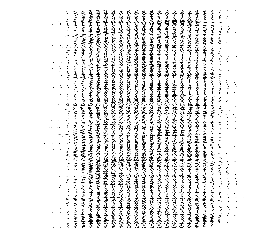

In [21]:
plt.imshow(X_train[:800], cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

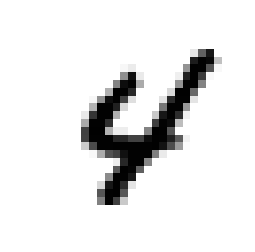

tensor(4)


In [9]:
i = 100
plt.imshow(X_train[i, :].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print (y_train[i])

In [10]:
import torch.nn as nn

net = nn.Sequential(
    nn.Linear(28*28, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
).cuda()

In [11]:
loss_function=nn.CrossEntropyLoss()
metrics=[accuracy]

In [12]:
learn = Learner(data=data, model=net, loss_func=loss_function, metrics=metrics)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


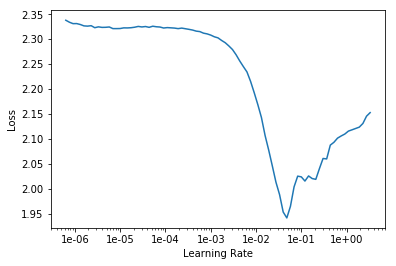

In [14]:
learn.recorder.plot()

In [15]:
learn.fit(10, 1e-2)

Total time: 01:25
epoch  train_loss  valid_loss  accuracy
1      0.301811    0.287950    0.916214  (00:02)
2      0.275533    0.287306    0.918286  (00:02)
3      0.266199    0.295305    0.918429  (00:02)
4      0.257672    0.251156    0.929643  (00:02)
5      0.242978    0.288218    0.920000  (00:02)
6      0.265839    0.233432    0.933786  (00:02)
7      0.237062    0.265112    0.927214  (00:02)
8      0.243067    0.246459    0.930571  (00:02)
9      0.226868    0.272223    0.925571  (00:02)
10     0.260867    0.248833    0.931929  (00:02)
11     0.221767    0.273240    0.923071  (00:02)
12     0.243770    0.288693    0.917143  (00:02)
13     0.229715    0.249112    0.932929  (00:02)
14     0.258309    0.250329    0.933429  (00:02)
15     0.227472    0.234295    0.934643  (00:02)
16     0.213850    0.249493    0.931643  (00:02)
17     0.253753    0.275717    0.922214  (00:02)
18     0.235905    0.292696    0.921714  (00:02)
19     0.243737    0.243306    0.935214  (00:02)
20     0.22

In [16]:
net = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
).cuda()

In [17]:
learn = Learner(data=data, model=net, loss_func=loss_function, metrics=metrics)

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


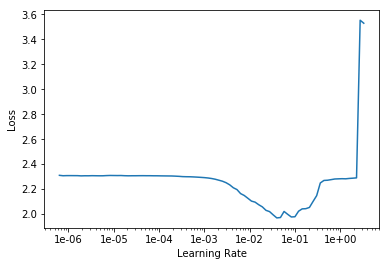

In [19]:
learn.recorder.plot()

In [20]:
learn.fit(10, 1e-2)

Total time: 00:31
epoch  train_loss  valid_loss  accuracy
1      0.248599    0.222569    0.937500  (00:03)
2      0.200483    0.185847    0.954071  (00:03)
3      0.192859    0.193399    0.951643  (00:03)
4      0.164250    0.224448    0.945643  (00:03)
5      0.167704    0.168833    0.957214  (00:03)
6      0.163182    0.192620    0.955857  (00:03)
7      0.133906    0.189450    0.961000  (00:03)
8      0.144449    0.164423    0.962571  (00:03)
9      0.123195    0.174872    0.961000  (00:03)
10     0.137193    0.189530    0.958714  (00:03)

